## 0-0. 디렉터리 설정 및 패키지 불러오기

In [10]:
#디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/EuronData"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 0-1. train, test 데이터 생성 및 저장

train 데이터들을 매번 for문으로 불러오기가 번거로워서 아예 합쳐서 새로운 csv로 저장했습니다!

In [5]:
train = pd.read_csv(path + '/bus_train/2022년_버스노선별_정류장별_시간대별_승하차_인원_정보(09월).csv', encoding='cp949')
test = pd.read_csv(path + '/bus_test/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(09월).csv', encoding='cp949')

<ipython-input-5-d5ae6b9570cb>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(path + '/bus_train/2022년_버스노선별_정류장별_시간대별_승하차_인원_정보(09월).csv', encoding='cp949')
<ipython-input-5-d5ae6b9570cb>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(path + '/bus_test/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(09월).csv', encoding='cp949')


In [6]:
for i in range(10, 13):
  train_i = pd.read_csv(path + '/bus_train/2022년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')
  train = pd.concat([train, train_i])
for i in range(1, 9):
  train_i = pd.read_csv(path + '/bus_train/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(0' + str(i) + '월).csv', encoding='cp949')
  train = pd.concat([train, train_i])

<ipython-input-6-2511b223fdfb>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_i = pd.read_csv(path + '/bus_train/2022년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')
<ipython-input-6-2511b223fdfb>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_i = pd.read_csv(path + '/bus_train/2022년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')
<ipython-input-6-2511b223fdfb>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_i = pd.read_csv(path + '/bus_train/2022년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')
<ipython-input-6-2511b223fdfb>:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_i = pd.read_csv(path + '/bus_train/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(0' + str(i) + '월).csv', encoding='cp949')

In [7]:
for i in range(10, 12):
  test_i = pd.read_csv(path + '/bus_test/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')
  test = pd.concat([test, test_i])

<ipython-input-7-6b2e71ea8825>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test_i = pd.read_csv(path + '/bus_test/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')
<ipython-input-7-6b2e71ea8825>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test_i = pd.read_csv(path + '/bus_test/2023년_버스노선별_정류장별_시간대별_승하차_인원_정보(' + str(i) + '월).csv', encoding='cp949')


In [8]:
train.to_csv('bus_train_all.csv', index=False)
test.to_csv('bus_test_all.csv', index=False)

# 1. train 데이터 가공

## 1-1. 불필요 행, 열 제거

In [13]:
train = pd.read_csv(path + '/bus_train_all.csv')
test = pd.read_csv(path + '/bus_test_all.csv')

<ipython-input-13-0ad5c7cdae11>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(path + '/bus_train_all.csv')
<ipython-input-13-0ad5c7cdae11>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(path + '/bus_test_all.csv')


In [14]:
#불필요한 행 제거 (야간버스)
train = train[train['교통수단타입명'] != '서울심야버스']

In [15]:
#불필요한 열 제거 (등록일자, 교통수단타입코드, 버스정류장ARS번호, 표준버스정류장ID, 노선명)
train.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',
                   '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수',
                   '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수'],axis=1,inplace=True)

## 1-2. 퇴근 시간 정의

In [16]:
#시간별 각 총 승차 인원 기준으로 Bar Chart 생성 위한 데이터 프레임 생성 (데이크루 윤슬 코드 참고했습니다!)
ride_time = ['16시승차총승객수', '17시승차총승객수', '18시승차총승객수', '19시승차총승객수', '20시승차총승객수', '21시승차총승객수']
ridesum=[]
for i in [202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308]:
  ridesum.append(train[train['사용년월']==i][ride_time].sum())
ridesum

[16시승차총승객수     9399919
 17시승차총승객수     9881500
 18시승차총승객수    10963417
 19시승차총승객수     7981364
 20시승차총승객수     5989928
 21시승차총승객수     5646670
 dtype: int64,
 16시승차총승객수     9470350
 17시승차총승객수    10091924
 18시승차총승객수    11065661
 19시승차총승객수     7984332
 20시승차총승객수     6165498
 21시승차총승객수     5847212
 dtype: int64,
 16시승차총승객수     9374410
 17시승차총승객수    10204571
 18시승차총승객수    11336188
 19시승차총승객수     8011482
 20시승차총승객수     6051076
 21시승차총승객수     5773533
 dtype: int64,
 16시승차총승객수     9468265
 17시승차총승객수    10362839
 18시승차총승객수    11349777
 19시승차총승객수     8025800
 20시승차총승객수     6164065
 21시승차총승객수     5959201
 dtype: int64,
 16시승차총승객수     7779863
 17시승차총승객수     8983536
 18시승차총승객수    10340872
 19시승차총승객수     7416564
 20시승차총승객수     5574153
 21시승차총승객수     5278811
 dtype: int64,
 16시승차총승객수     7680665
 17시승차총승객수     8870360
 18시승차총승객수    10289824
 19시승차총승객수     7481177
 20시승차총승객수     5608617
 21시승차총승객수     5306911
 dtype: int64,
 16시승차총승객수     9835076
 17시승차총승객수    10424148
 18시승차총승객수    11648536
 19시승차총승객수   

In [17]:
#ridesum으로 데이터프레임 생성
month_ride=pd.DataFrame(ridesum, columns=ride_time)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*a

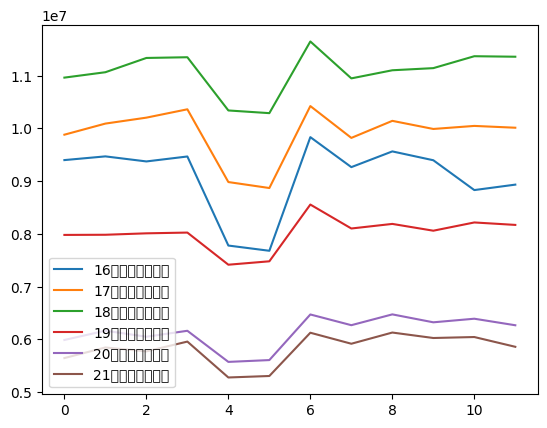

In [18]:
#꺾은선 그래프 생성
month_ride.plot()

<Axes: >

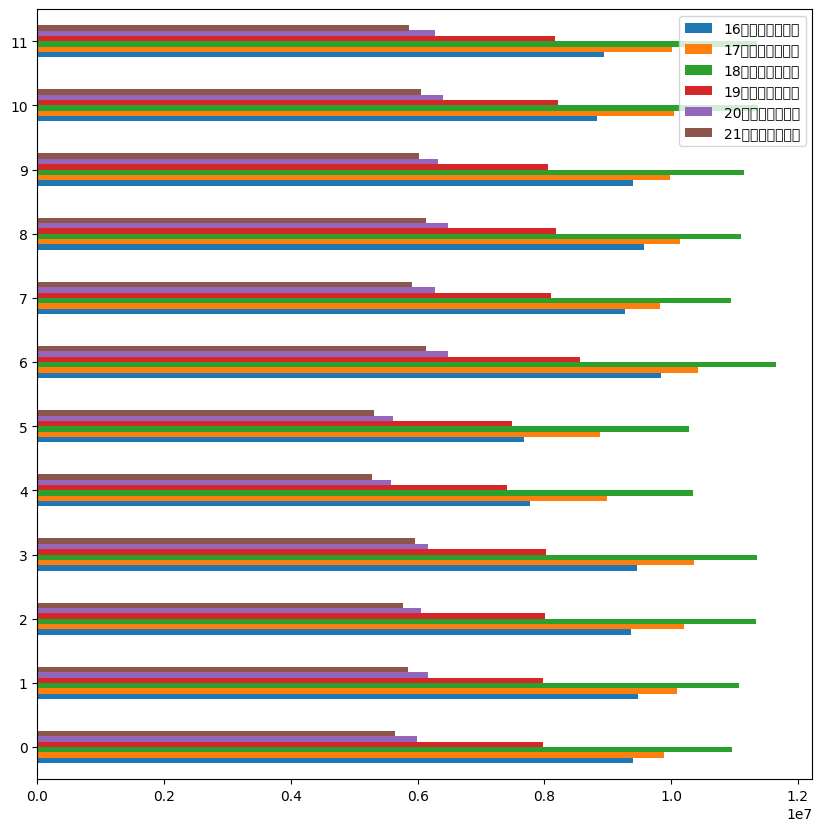

In [19]:
#막대그래프 생성
month_ride.plot(kind='barh', figsize=(10, 10))

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*a

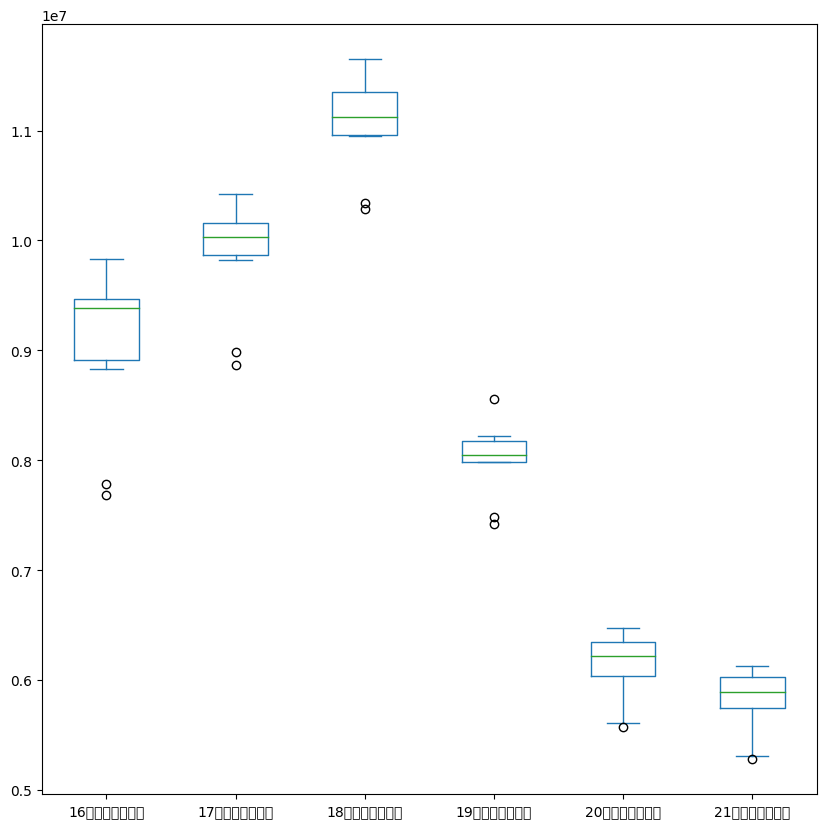

In [20]:
#박스 플롯 생성
month_ride.plot(kind='box', figsize=(10, 10))

따라서 결론적으로 17:00-19:00 시가 퇴근 시간이라고 정의를 내렸다!

## 1-3. 새로운 칼럼 정의

In [22]:
train

,사용년월,노선번호,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,202209,741,종로2가사거리(00077),139,95,515,259,379,300,430,...,555,416,627,342,389,301,194,263,179,서울간선버스
1,202209,470,종로2가사거리(00067),163,79,625,246,607,380,658,...,540,407,517,360,386,327,185,342,169,서울간선버스
4,202209,100,창경궁.서울대학교병원(00031),76,263,151,445,415,694,262,...,93,223,86,151,60,235,23,55,36,서울간선버스
5,202209,107,창경궁.서울대학교병원(00058),29,149,60,504,104,705,67,...,44,88,37,42,25,24,18,12,12,서울간선버스
6,202209,104,창경궁.서울대학교병원(00024),127,383,249,681,396,1053,363,...,120,246,83,147,65,194,51,57,65,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,서울간선버스
498172,202308,9404,구미동차고지(기점가상)(00001),1,5,1,2,1,0,1,...,3,2,0,0,0,1,2,2,3,서울광역버스
498173,202308,9404,구미동차고지(종점가상)(00060),0,1,0,0,0,3,0,...,1,0,3,0,5,0,3,0,0,서울광역버스
498174,202308,9707,가좌동종점(종점가상)(00078),0,0,0,2,0,8,0,...,3,0,6,0,3,0,4,0,3,서울광역버스


In [31]:
train['역명'].str[-6:-1]

0         00077
1         00067
4         00031
5         00058
6         00024
          ...  
498171    00081
498172    00001
498173    00060
498174    00078
498175    00127
Name: 역명, Length: 450530, dtype: object

In [33]:
#역명 뒤 다섯자리 코드 칼럼 정의(bus_station_id)
train.insert(3, 'bus_station_id', train['역명'].str[-6:-1])
train

,사용년월,노선번호,역명,bus_station_id,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,202209,741,종로2가사거리(00077),00077,139,95,515,259,379,300,...,555,416,627,342,389,301,194,263,179,서울간선버스
1,202209,470,종로2가사거리(00067),00067,163,79,625,246,607,380,...,540,407,517,360,386,327,185,342,169,서울간선버스
4,202209,100,창경궁.서울대학교병원(00031),00031,76,263,151,445,415,694,...,93,223,86,151,60,235,23,55,36,서울간선버스
5,202209,107,창경궁.서울대학교병원(00058),00058,29,149,60,504,104,705,...,44,88,37,42,25,24,18,12,12,서울간선버스
6,202209,104,창경궁.서울대학교병원(00024),00024,127,383,249,681,396,1053,...,120,246,83,147,65,194,51,57,65,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,서울간선버스
498172,202308,9404,구미동차고지(기점가상)(00001),00001,1,5,1,2,1,0,...,3,2,0,0,0,1,2,2,3,서울광역버스
498173,202308,9404,구미동차고지(종점가상)(00060),00060,0,1,0,0,0,3,...,1,0,3,0,5,0,3,0,0,서울광역버스
498174,202308,9707,가좌동종점(종점가상)(00078),00078,0,0,0,2,0,8,...,3,0,6,0,3,0,4,0,3,서울광역버스


In [1]:
before = []
for i in range(6, 22):
  before.append(str(i) + '시승차총승객수')
  before.append(str(i) + '시하차총승객수')
after = []
for i in range(6, 22):
  after.append(str(i) +'~' + str(i+1) + '_ride')
  after.append(str(i) +'~' + str(i+1) + '_takeoff')
rename_dict = dict(zip(before, after))

In [2]:
rename_dict

{'6시승차총승객수': '6~7_ride',
 '6시하차총승객수': '6~7_takeoff',
 '7시승차총승객수': '7~8_ride',
 '7시하차총승객수': '7~8_takeoff',
 '8시승차총승객수': '8~9_ride',
 '8시하차총승객수': '8~9_takeoff',
 '9시승차총승객수': '9~10_ride',
 '9시하차총승객수': '9~10_takeoff',
 '10시승차총승객수': '10~11_ride',
 '10시하차총승객수': '10~11_takeoff',
 '11시승차총승객수': '11~12_ride',
 '11시하차총승객수': '11~12_takeoff',
 '12시승차총승객수': '12~13_ride',
 '12시하차총승객수': '12~13_takeoff',
 '13시승차총승객수': '13~14_ride',
 '13시하차총승객수': '13~14_takeoff',
 '14시승차총승객수': '14~15_ride',
 '14시하차총승객수': '14~15_takeoff',
 '15시승차총승객수': '15~16_ride',
 '15시하차총승객수': '15~16_takeoff',
 '16시승차총승객수': '16~17_ride',
 '16시하차총승객수': '16~17_takeoff',
 '17시승차총승객수': '17~18_ride',
 '17시하차총승객수': '17~18_takeoff',
 '18시승차총승객수': '18~19_ride',
 '18시하차총승객수': '18~19_takeoff',
 '19시승차총승객수': '19~20_ride',
 '19시하차총승객수': '19~20_takeoff',
 '20시승차총승객수': '20~21_ride',
 '20시하차총승객수': '20~21_takeoff',
 '21시승차총승객수': '21~22_ride',
 '21시하차총승객수': '21~22_takeoff'}

In [34]:
#칼럼명 영어로 새로 정의
#id (데이터 고유값) <- ?? 제가 보고서에 이렇게 적었는데 대체 이게 뭘까요 제가 잘못 적은 것 같습니다. 우선 안만들었습니다.
#month(월 단위), bus_station_id(역명 뒤 다섯자리), bus_id(노선 번호), station_name(역명)
#X~Y ride(1시간 단위 승차 총 승객 수), X~Y takeoff(1시간 단위 하차 총 승객 수), 18~20 ride(퇴근 시간 승차 총 승객 수), bus_type(교통 수단 타입명)
train.rename(columns = {'사용년월':'month', '노선번호':'bus_id', '역명':'station_name', '교통수단타입명':'bus_type'}, inplace = True)
train.rename(columns = rename_dict, inplace = True)
train

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,bus_type
0,202209,741,종로2가사거리(00077),00077,139,95,515,259,379,300,...,555,416,627,342,389,301,194,263,179,서울간선버스
1,202209,470,종로2가사거리(00067),00067,163,79,625,246,607,380,...,540,407,517,360,386,327,185,342,169,서울간선버스
4,202209,100,창경궁.서울대학교병원(00031),00031,76,263,151,445,415,694,...,93,223,86,151,60,235,23,55,36,서울간선버스
5,202209,107,창경궁.서울대학교병원(00058),00058,29,149,60,504,104,705,...,44,88,37,42,25,24,18,12,12,서울간선버스
6,202209,104,창경궁.서울대학교병원(00024),00024,127,383,249,681,396,1053,...,120,246,83,147,65,194,51,57,65,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,서울간선버스
498172,202308,9404,구미동차고지(기점가상)(00001),00001,1,5,1,2,1,0,...,3,2,0,0,0,1,2,2,3,서울광역버스
498173,202308,9404,구미동차고지(종점가상)(00060),00060,0,1,0,0,0,3,...,1,0,3,0,5,0,3,0,0,서울광역버스
498174,202308,9707,가좌동종점(종점가상)(00078),00078,0,0,0,2,0,8,...,3,0,6,0,3,0,4,0,3,서울광역버스


In [37]:
#두 시간 단위로 칼럼 통합
for i in range(3, 11):
  train[str(i*2) + '~' + str(i*2 + 2) + '_ride'] = train[str(i*2) + '~' + str(i*2 + 1) + '_ride'] + train[str(i*2 + 1) + '~' + str(i*2 + 2) + '_ride']
  train[str(i*2) + '~' + str(i*2 + 2) + '_takeoff'] = train[str(i*2) + '~' + str(i*2 + 1) + '_takeoff'] + train[str(i*2 + 1) + '~' + str(i*2 + 2) + '_takeoff']
train

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,18~20_ride,20~22_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff,12~14_takeoff,14~16_takeoff,16~18_takeoff,18~20_takeoff,20~22_takeoff
0,202209,741,종로2가사거리(00077),00077,139,95,515,259,379,300,...,758,564,354,753,769,800,763,991,1016,373
1,202209,470,종로2가사거리(00067),00067,163,79,625,246,607,380,...,767,669,325,782,696,982,803,950,903,354
4,202209,100,창경궁.서울대학교병원(00031),00031,76,263,151,445,415,694,...,374,290,708,1114,504,450,353,209,146,59
5,202209,107,창경궁.서울대학교병원(00058),00058,29,149,60,504,104,705,...,130,36,653,1070,287,232,159,92,62,30
6,202209,104,창경궁.서울대학교병원(00024),00024,127,383,249,681,396,1053,...,393,251,1064,1765,509,460,451,228,148,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
498172,202308,9404,구미동차고지(기점가상)(00001),00001,1,5,1,2,1,0,...,2,3,7,0,1,1,1,3,0,5
498173,202308,9404,구미동차고지(종점가상)(00060),00060,0,1,0,0,0,3,...,0,0,1,3,1,2,5,3,8,3
498174,202308,9707,가좌동종점(종점가상)(00078),00078,0,0,0,2,0,8,...,0,0,2,11,3,7,2,11,9,7


In [38]:
train.columns

Index(['month', 'bus_id', 'station_name', 'bus_station_id', '6~7_ride',
       '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride', '8~9_takeoff',
       '9~10_ride', '9~10_takeoff', '10~11_ride', '10~11_takeoff',
       '11~12_ride', '11~12_takeoff', '12~13_ride', '12~13_takeoff',
       '13~14_ride', '13~14_takeoff', '14~15_ride', '14~15_takeoff',
       '15~16_ride', '15~16_takeoff', '16~17_ride', '16~17_takeoff',
       '17~18_ride', '17~18_takeoff', '18~19_ride', '18~19_takeoff',
       '19~20_ride', '19~20_takeoff', '20~21_ride', '20~21_takeoff',
       '21~22_ride', '21~22_takeoff', 'bus_type', '6~8_ride', '8~10_ride',
       '10~12_ride', '12~14_ride', '14~16_ride', '16~18_ride', '18~20_ride',
       '20~22_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff',
       '12~14_takeoff', '14~16_takeoff', '16~18_takeoff', '18~20_takeoff',
       '20~22_takeoff'],
      dtype='object')

In [39]:
train.drop(labels=['6~7_ride',
       '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride', '8~9_takeoff',
       '9~10_ride', '9~10_takeoff', '10~11_ride', '10~11_takeoff',
       '11~12_ride', '11~12_takeoff', '12~13_ride', '12~13_takeoff',
       '13~14_ride', '13~14_takeoff', '14~15_ride', '14~15_takeoff',
       '15~16_ride', '15~16_takeoff', '16~17_ride', '16~17_takeoff',
       '17~18_ride', '17~18_takeoff', '18~19_ride', '18~19_takeoff',
       '19~20_ride', '19~20_takeoff', '20~21_ride', '20~21_takeoff',
       '21~22_ride', '21~22_takeoff',],axis=1,inplace=True)
train

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,8~10_ride,10~12_ride,12~14_ride,14~16_ride,...,18~20_ride,20~22_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff,12~14_takeoff,14~16_takeoff,16~18_takeoff,18~20_takeoff,20~22_takeoff
0,202209,741,종로2가사거리(00077),00077,서울간선버스,654,809,576,574,643,...,758,564,354,753,769,800,763,991,1016,373
1,202209,470,종로2가사거리(00067),00067,서울간선버스,788,1265,1217,1074,839,...,767,669,325,782,696,982,803,950,903,354
4,202209,100,창경궁.서울대학교병원(00031),00031,서울간선버스,227,677,282,193,381,...,374,290,708,1114,504,450,353,209,146,59
5,202209,107,창경궁.서울대학교병원(00058),00058,서울간선버스,89,171,101,76,92,...,130,36,653,1070,287,232,159,92,62,30
6,202209,104,창경궁.서울대학교병원(00024),00024,서울간선버스,376,759,381,312,344,...,393,251,1064,1765,509,460,451,228,148,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498171,202308,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
498172,202308,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,2,2,0,1,1,...,2,3,7,0,1,1,1,3,0,5
498173,202308,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,0,0,0,0,...,0,0,1,3,1,2,5,3,8,3
498174,202308,9707,가좌동종점(종점가상)(00078),00078,서울광역버스,0,0,0,0,0,...,0,0,2,11,3,7,2,11,9,7


# 2. test 데이터 가공

위의 train과 같은 과정을 test에 반복함.

In [40]:
#불필요한 행 제거 (야간버스)
test = test[test['교통수단타입명'] != '서울심야버스']
#불필요한 열 제거 (등록일자, 교통수단타입코드, 버스정류장ARS번호, 표준버스정류장ID, 노선명)
test.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',
                   '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수',
                   '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수'],axis=1,inplace=True)
#역명 뒤 다섯자리 코드 칼럼 정의(bus_station_id)
test.insert(3, 'bus_station_id', test['역명'].str[-6:-1])
#칼럼명 영어로 새로 정의
#id (데이터 고유값) <- ?? 제가 보고서에 이렇게 적었는데 대체 이게 뭘까요 제가 잘못 적은 것 같습니다. 우선 안만들었습니다.
#month(월 단위), bus_station_id(역명 뒤 다섯자리), bus_id(노선 번호), station_name(역명)
#X~Y ride(1시간 단위 승차 총 승객 수), X~Y takeoff(1시간 단위 하차 총 승객 수), 18~20 ride(퇴근 시간 승차 총 승객 수), bus_type(교통 수단 타입명)
test.rename(columns = {'사용년월':'month', '노선번호':'bus_id', '역명':'station_name', '교통수단타입명':'bus_type'}, inplace = True)
test.rename(columns = rename_dict, inplace = True)
test

<ipython-input-40-b28ce93ca2ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=['등록일자', '교통수단타입코드', '버스정류장ARS번호', '표준버스정류장ID', '노선명',


,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,bus_type
1,202309,470,종로2가사거리(00066),00066,201,66,498,283,662,346,...,524,377,581,343,447,378,221,419,260,서울간선버스
3,202309,741,종로2가사거리(00075),00075,127,77,397,281,392,356,...,523,441,688,426,512,292,279,303,231,서울간선버스
4,202309,100,창경궁.서울대학교병원(00031),00031,100,243,158,438,281,560,...,80,218,67,147,36,152,26,77,31,서울간선버스
6,202309,104,창경궁.서울대학교병원(00024),00024,100,368,195,585,406,918,...,61,313,82,210,56,248,41,50,66,서울간선버스
8,202309,171,창경궁.서울대학교병원(00012),00012,150,252,428,547,515,1114,...,113,407,84,193,55,265,28,172,41,서울간선버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125571,202311,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,서울간선버스
125572,202311,9404,구미동차고지(기점가상)(00001),00001,3,5,0,2,1,1,...,1,2,2,2,3,0,3,0,0,서울광역버스
125573,202311,9404,구미동차고지(종점가상)(00060),00060,0,3,0,2,0,0,...,0,0,2,0,3,0,1,0,6,서울광역버스
125574,202311,9701,가좌동종점(종점가상)(00127),00127,0,0,0,0,0,17,...,3,0,3,0,2,0,0,0,1,서울광역버스


In [41]:
#두 시간 단위로 칼럼 통합
for i in range(3, 11):
  test[str(i*2) + '~' + str(i*2 + 2) + '_ride'] = test[str(i*2) + '~' + str(i*2 + 1) + '_ride'] + test[str(i*2 + 1) + '~' + str(i*2 + 2) + '_ride']
  test[str(i*2) + '~' + str(i*2 + 2) + '_takeoff'] = test[str(i*2) + '~' + str(i*2 + 1) + '_takeoff'] + test[str(i*2 + 1) + '~' + str(i*2 + 2) + '_takeoff']
test

,month,bus_id,station_name,bus_station_id,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
1,202309,470,종로2가사거리(00066),00066,201,66,498,283,662,346,...,988,882,744,833,672,989,720,1028,797,481
3,202309,741,종로2가사거리(00075),00075,127,77,397,281,392,356,...,627,868,613,859,659,968,867,1200,595,510
4,202309,100,창경궁.서울대학교병원(00031),00031,100,243,158,438,281,560,...,256,366,334,358,482,186,365,103,229,57
6,202309,104,창경궁.서울대학교병원(00024),00024,100,368,195,585,406,918,...,439,471,452,388,595,161,523,138,298,107
8,202309,171,창경궁.서울대학교병원(00012),00012,150,252,428,547,515,1114,...,518,361,636,269,992,241,600,139,437,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125571,202311,672,김포교통(종점가상)(00081),00081,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
125572,202311,9404,구미동차고지(기점가상)(00001),00001,3,5,0,2,1,1,...,5,2,1,0,2,2,4,5,0,3
125573,202311,9404,구미동차고지(종점가상)(00060),00060,0,3,0,2,0,0,...,0,0,0,3,0,3,0,5,0,7
125574,202311,9701,가좌동종점(종점가상)(00127),00127,0,0,0,0,0,17,...,0,2,0,3,0,6,0,5,0,1


In [42]:
test.drop(labels=['6~7_ride',
       '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride', '8~9_takeoff',
       '9~10_ride', '9~10_takeoff', '10~11_ride', '10~11_takeoff',
       '11~12_ride', '11~12_takeoff', '12~13_ride', '12~13_takeoff',
       '13~14_ride', '13~14_takeoff', '14~15_ride', '14~15_takeoff',
       '15~16_ride', '15~16_takeoff', '16~17_ride', '16~17_takeoff',
       '17~18_ride', '17~18_takeoff', '18~19_ride', '18~19_takeoff',
       '19~20_ride', '19~20_takeoff', '20~21_ride', '20~21_takeoff',
       '21~22_ride', '21~22_takeoff',],axis=1,inplace=True)
test

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
1,202309,470,종로2가사거리(00066),00066,서울간선버스,699,349,1292,716,1191,...,988,882,744,833,672,989,720,1028,797,481
3,202309,741,종로2가사거리(00075),00075,서울간선버스,524,358,838,816,588,...,627,868,613,859,659,968,867,1200,595,510
4,202309,100,창경궁.서울대학교병원(00031),00031,서울간선버스,258,681,546,977,313,...,256,366,334,358,482,186,365,103,229,57
6,202309,104,창경궁.서울대학교병원(00024),00024,서울간선버스,295,953,689,1377,420,...,439,471,452,388,595,161,523,138,298,107
8,202309,171,창경궁.서울대학교병원(00012),00012,서울간선버스,578,799,911,1682,651,...,518,361,636,269,992,241,600,139,437,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125571,202311,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
125572,202311,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,3,7,2,1,3,...,5,2,1,0,2,2,4,5,0,3
125573,202311,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,5,0,1,0,...,0,0,0,3,0,3,0,5,0,7
125574,202311,9701,가좌동종점(종점가상)(00127),00127,서울광역버스,0,0,0,19,0,...,0,2,0,3,0,6,0,5,0,1


# 3. 날씨 데이터 가공

## 3-0. 데이터 불러오기

In [43]:
weather_temp = pd.read_csv(path + '/extremum_20240124022608.csv', skiprows = 11, encoding='cp949')
weather_temp

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,2022-01,-2.2,2.6,8.4,2022-01-24,-6.2,-11.3,2022-01-12
1,108,서울,2022-02,-1.1,3.8,11.5,2022-02-28,-5.3,-10.7,2022-02-17
2,108,서울,2022-03,7.7,12.7,19.5,2022-03-12,3.2,-3.0,2022-03-06
3,108,서울,2022-04,14.8,20.6,28.7,2022-04-26,10.0,3.5,2022-04-03
4,108,서울,2022-05,19.1,25.0,30.7,2022-05-23,13.9,7.9,2022-05-01
5,108,서울,2022-06,23.3,27.5,32.7,2022-06-11,19.8,14.9,2022-06-15
6,108,서울,2022-07,27.3,31.0,36.1,2022-07-30,24.2,20.8,2022-07-21
7,108,서울,2022-08,25.7,28.9,32.9,2022-08-04,23.1,16.1,2022-08-28
8,108,서울,2022-09,22.4,27.2,32.5,2022-09-18,18.2,12.3,2022-09-24
9,108,서울,2022-10,14.6,19.7,27.6,2022-10-01,10.3,4.4,2022-10-19


In [44]:
weather_rain = pd.read_csv(path + '/extremum_20240124165040.csv', skiprows = 12, encoding='cp949')
weather_rain

,\t지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Unnamed: 8
0,108,서울,2022-01,5.5,1.7,2022-01-19,NaN,NaN,NaN
1,108,서울,2022-02,4.7,1.7,2022-02-14,NaN,NaN,NaN
2,108,서울,2022-03,102.6,42.1,2022-03-13,NaN,NaN,NaN
3,108,서울,2022-04,20.4,15.5,2022-04-29,4.0,2022-04-29,NaN
4,108,서울,2022-05,7.5,3.5,2022-05-25,2.9,2022-05-25,NaN
5,108,서울,2022-06,393.8,176.2,2022-06-30,34.4,2022-06-23,NaN
6,108,서울,2022-07,252.3,114.5,2022-07-13,33.8,2022-07-16,NaN
7,108,서울,2022-08,564.8,129.6,2022-08-08,47.1,2022-08-19,NaN
8,108,서울,2022-09,201.5,120.0,2022-09-05,12.8,2022-09-05,NaN
9,108,서울,2022-10,124.1,76.0,2022-10-03,14.7,2022-10-03,NaN


## 3-1. 불필요 칼럼 제거 및 정리

In [45]:
#기온 데이터
#merge로 병합할 것을 대비, 같은 날짜 형식으로 바꾸는 과정 필요
weather_temp = weather_temp.rename(columns = {'일시':'사용년월'})
for i in range(24):
  weather_temp.loc[i, '사용년월'] = str(weather_temp.loc[i, '사용년월'][:4])+str(weather_temp.loc[i, '사용년월'][5:])
#불필요한 칼럼 제거
weather_temp.drop(labels=['\t\t지점번호','지점명', '\t최고기온일자', '최저기온일자'],axis=1,inplace=True)
weather_temp

,사용년월,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,202201,-2.2,2.6,8.4,-6.2,-11.3
1,202202,-1.1,3.8,11.5,-5.3,-10.7
2,202203,7.7,12.7,19.5,3.2,-3.0
3,202204,14.8,20.6,28.7,10.0,3.5
4,202205,19.1,25.0,30.7,13.9,7.9
5,202206,23.3,27.5,32.7,19.8,14.9
6,202207,27.3,31.0,36.1,24.2,20.8
7,202208,25.7,28.9,32.9,23.1,16.1
8,202209,22.4,27.2,32.5,18.2,12.3
9,202210,14.6,19.7,27.6,10.3,4.4


In [46]:
#강수량 데이터
#merge로 병합할 것을 대비, 같은 날짜 형식으로 바꾸는 과정 필요
weather_rain = weather_rain.rename(columns = {'일시':'사용년월'})
for i in range(24):
  weather_rain.loc[i, '사용년월'] = str(weather_rain.loc[i, '사용년월'][:4])+str(weather_rain.loc[i, '사용년월'][5:])
#불필요한 칼럼 제거
weather_rain.drop(labels=['\t지점번호','지점명', '일최다강수량일자', '1시간최다강수량(mm)', '1시간최다강수량일자', 'Unnamed: 8'],axis=1,inplace=True)
weather_rain

,사용년월,강수량(mm),일최다강수량(mm)
0,202201,5.5,1.7
1,202202,4.7,1.7
2,202203,102.6,42.1
3,202204,20.4,15.5
4,202205,7.5,3.5
5,202206,393.8,176.2
6,202207,252.3,114.5
7,202208,564.8,129.6
8,202209,201.5,120.0
9,202210,124.1,76.0


In [47]:
#merge 이전 데이터 타입 변환
weather_temp['사용년월'] = weather_temp['사용년월'].astype(int)
weather_rain['사용년월'] = weather_rain['사용년월'].astype(int)

In [49]:
weather_temp.rename(columns = {'사용년월':'month'}, inplace = True)
weather_rain.rename(columns = {'사용년월':'month'}, inplace = True)

## 3-2. merge로 데이터 병합

In [50]:
train_weather = pd.merge(train,weather_temp, how='inner',on='month')
train_weather = pd.merge(train_weather,weather_rain, how='inner',on='month')
train_weather

,month,bus_id,station_name,bus_station_id,bus_type,6~8_ride,8~10_ride,10~12_ride,12~14_ride,14~16_ride,...,16~18_takeoff,18~20_takeoff,20~22_takeoff,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),일최다강수량(mm)
0,202209,741,종로2가사거리(00077),00077,서울간선버스,654,809,576,574,643,...,991,1016,373,22.4,27.2,32.5,18.2,12.3,201.5,120.0
1,202209,470,종로2가사거리(00067),00067,서울간선버스,788,1265,1217,1074,839,...,950,903,354,22.4,27.2,32.5,18.2,12.3,201.5,120.0
2,202209,100,창경궁.서울대학교병원(00031),00031,서울간선버스,227,677,282,193,381,...,209,146,59,22.4,27.2,32.5,18.2,12.3,201.5,120.0
3,202209,107,창경궁.서울대학교병원(00058),00058,서울간선버스,89,171,101,76,92,...,92,62,30,22.4,27.2,32.5,18.2,12.3,201.5,120.0
4,202209,104,창경궁.서울대학교병원(00024),00024,서울간선버스,376,759,381,312,344,...,228,148,116,22.4,27.2,32.5,18.2,12.3,201.5,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450525,202308,672,김포교통(종점가상)(00081),00081,서울간선버스,0,0,0,0,0,...,1,0,0,27.2,30.8,35.8,24.3,20.8,298.1,86.1
450526,202308,9404,구미동차고지(기점가상)(00001),00001,서울광역버스,2,2,0,1,1,...,3,0,5,27.2,30.8,35.8,24.3,20.8,298.1,86.1
450527,202308,9404,구미동차고지(종점가상)(00060),00060,서울광역버스,0,0,0,0,0,...,3,8,3,27.2,30.8,35.8,24.3,20.8,298.1,86.1
450528,202308,9707,가좌동종점(종점가상)(00078),00078,서울광역버스,0,0,0,0,0,...,11,9,7,27.2,30.8,35.8,24.3,20.8,298.1,86.1


# 4. EDA

## 4-1. 승차 칼럼별 분포

In [54]:
columns = train.columns

In [55]:
columns

Index(['month', 'bus_id', 'station_name', 'bus_station_id', 'bus_type',
       '6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride',
       '16~18_ride', '18~20_ride', '20~22_ride', '6~8_takeoff', '8~10_takeoff',
       '10~12_takeoff', '12~14_takeoff', '14~16_takeoff', '16~18_takeoff',
       '18~20_takeoff', '20~22_takeoff'],
      dtype='object')

<ipython-input-56-b256b15736a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train[i])
<ipython-input-56-b256b15736a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train[i])
<ipython-input-56-b256b15736a6>:3: UserWarning: 

`distplot` is a deprecated function and will be remove

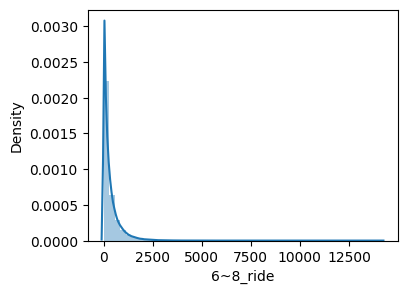

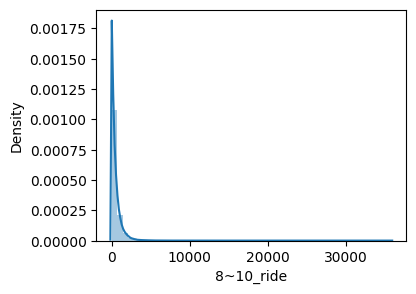

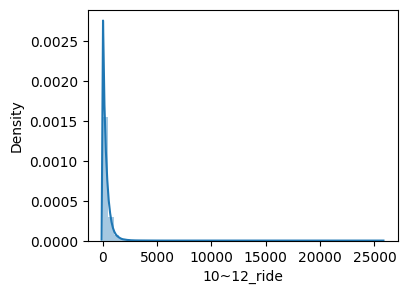

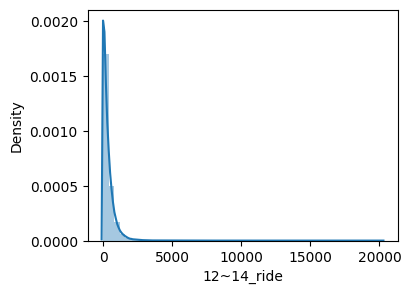

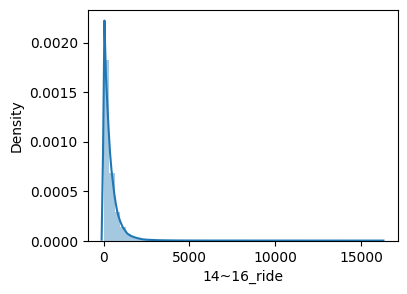

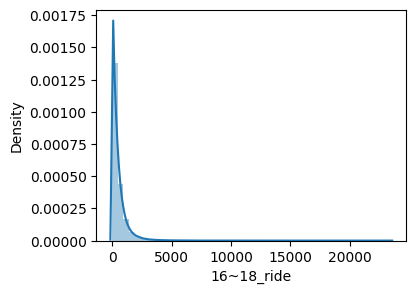

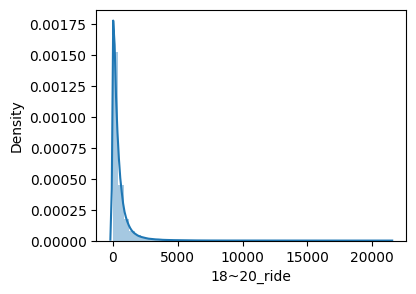

In [56]:
for i in columns[5:12]:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.distplot(train[i])

In [ ]:
for i in categorical[1:]:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.countplot(data=DF[categorical], x=i, hue="Diabetes_binary",  palette='cool')

In [ ]:
ax = plt.subplots(figsize=(4, 3))
ax = sns.countplot(data=DF[categorical], x=i, hue="Diabetes_binary",  palette='cool')
plt.bar()

## 4-2. 상관계수로 날씨 데이터가 유의한 지 확인.

<ipython-input-53-a00c5cb2645a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=round(train_weather.corr(),3)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarni

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*a

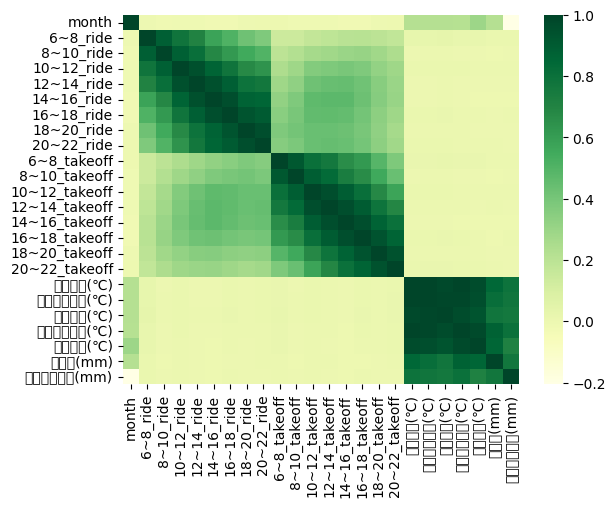

In [53]:
#상관계수 히트맵 생성
corr_df=round(train_weather.corr(),3)
sns.heatmap(corr_df, annot=False, cmap='YlGn')

...죄송합니다 여러분... 정말 관련이 없네요.. 이렇게까지 노란색이 나올 줄은... 허허 죄송합니다... 날씨 데이터는 빼고 해야할 것 같아요... 하하... 죄송합니다... 😭